##  

# The Sparks Foundation (TSF) Data Science & Business Analytics Internship.

# TASK 5 Exploratory data analysis - Terrorism

# Author - Shivam Khandekar

In [3]:
#IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#IMPORTING DATASET

file_name = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_name, encoding = 'ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
#Rename the data columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [7]:
df.columns

Index(['eventid', 'Year', 'Month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
#will take only those columns in consideration which are necessary for our  analysis
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",
         'kill','Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [9]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
df.shape

(181691, 18)

### DATA CLEANING

In [11]:
#checking for null values
df.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [12]:
#filling unknown where there is null value in state and city column 
df['State'].fillna("unknown", inplace = True)
df['City'].fillna("unknown", inplace = True)

In [13]:
df['Wound'] = df['Wound'].fillna(0).astype(int)
df['kill'] = df['kill'].fillna(0).astype(int)
df['casualities'] = df['kill'] + df['Wound']

In [14]:
df.isnull().sum()

Year                0
Month               0
day                 0
Country             0
State               0
Region              0
City                0
latitude         4556
longitude        4557
Attacktype          0
kill                0
Wound               0
target1           636
summary         66129
Group               0
Targettype          0
Weapon              0
motive         131130
casualities         0
dtype: int64

In [15]:
df.dropna(axis=1, inplace=True) # drop all other columns with null values

In [16]:
df.head()

,Year,Month,day,Country,State,Region,City,Attacktype,kill,Wound,Group,Targettype,Weapon,casualities
0,1970,7,2,Dominican Republic,unknown,Central America & Caribbean,Santo Domingo,Assassination,1,0,MANO-D,Private Citizens & Property,Unknown,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,Government (Diplomatic),Unknown,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1,0,Unknown,Journalists & Media,Unknown,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,0,0,Unknown,Government (Diplomatic),Explosives,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,0,0,Unknown,Government (Diplomatic),Incendiary,0


In [17]:
df.describe()

,Year,Month,day,kill,Wound,casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883291,5.150151
std,13.259430,3.388303,8.814045,11.227057,34.309746,40.555414
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


### DATA VISUALIZATION

In [18]:
print('Country with most attacks: ',df['Country'].value_counts().idxmax())
print('City with most attacks: ',df['City'].value_counts().index[1])
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['Attacktype'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


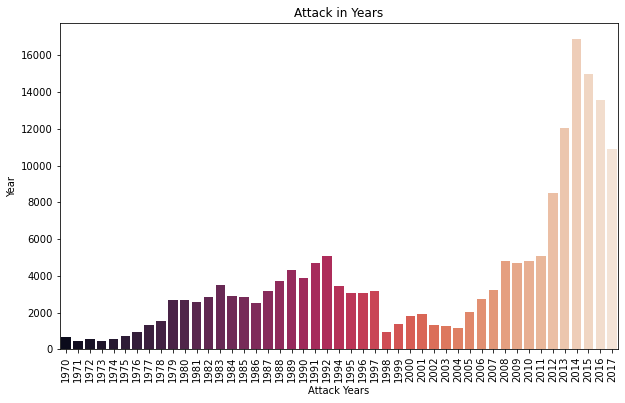

In [19]:
x_year = df['Year'].unique()
y_year = df['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(10,6))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=90)
sns.barplot(x=x_year, y=y_year, palette= 'rocket')
plt.show()

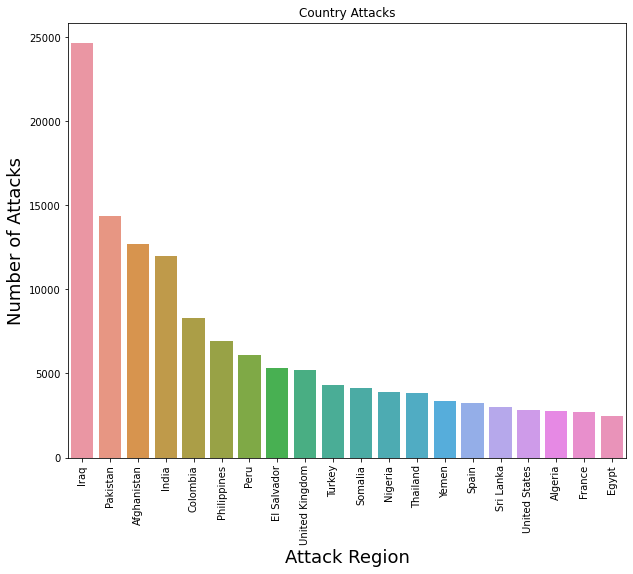

In [20]:
# country by attacks
plt.rcParams["figure.figsize"] = 10, 8
sns.barplot(x = df["Country"].value_counts()[:20].index, y=df["Country"].value_counts()[:20].values)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Region", fontsize=18)
plt.title("Country Attacks");

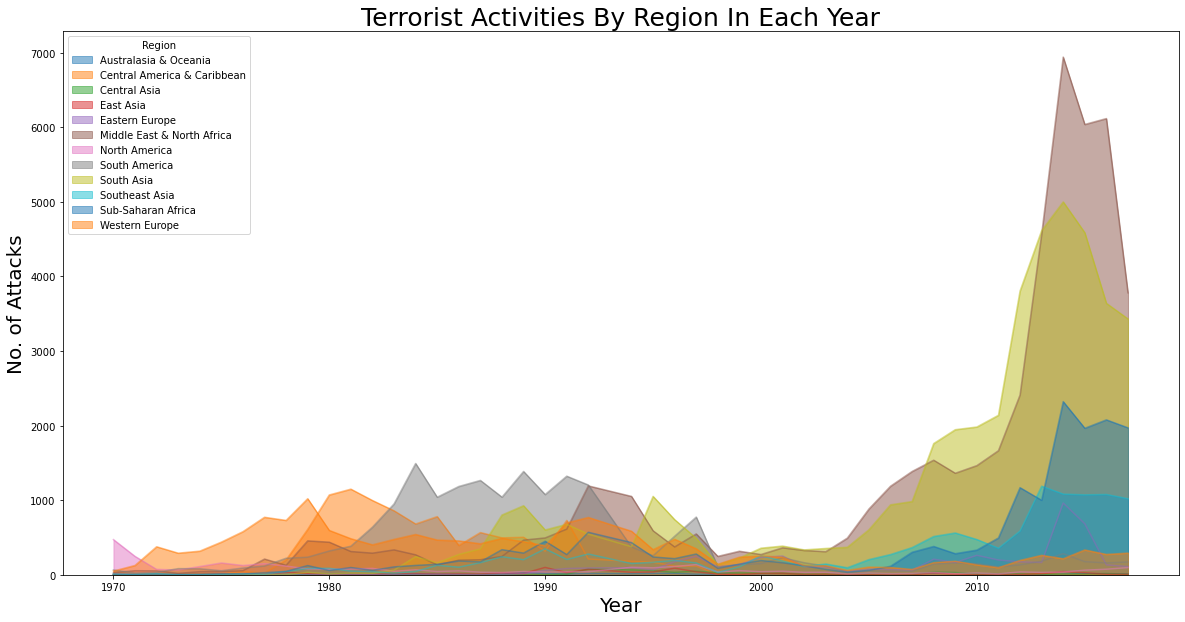

In [21]:
# Number of attacks over different regions
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('No. of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Attacks Group')

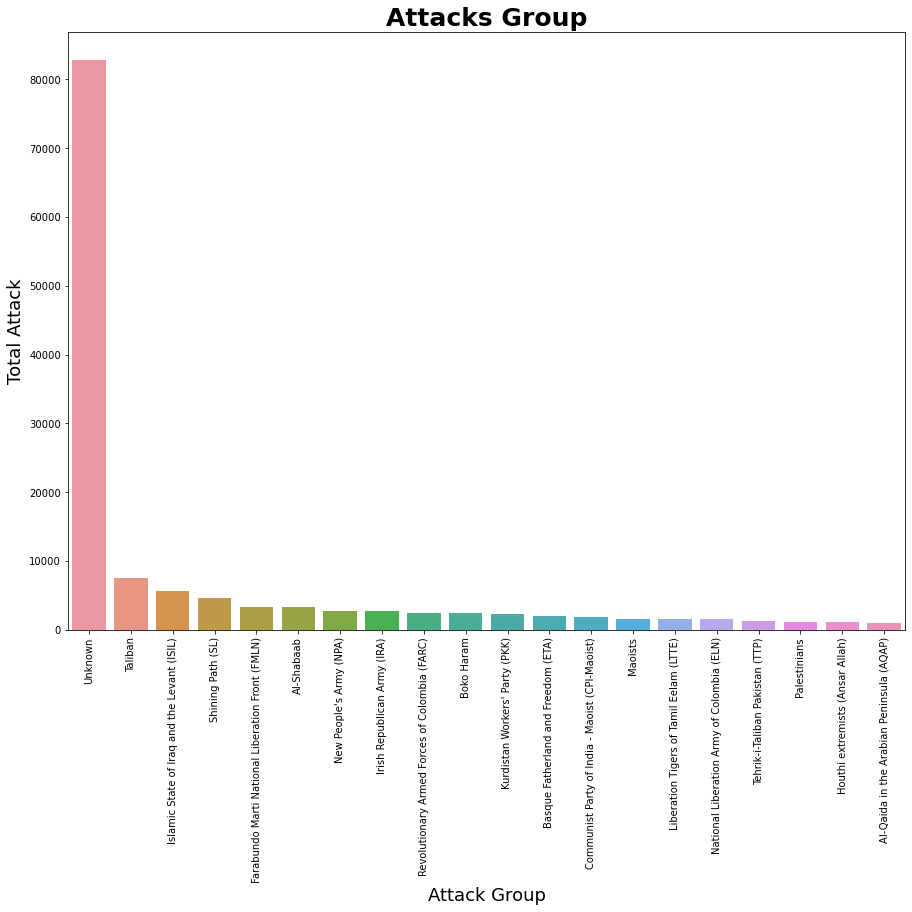

In [22]:
# Attack groups attacked over different cities
plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["Group"].value_counts()[:20].index, y=df["Group"].value_counts()[:20].values)
plt.ylabel("Total Attack", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Group", fontsize=18)
plt.title("Attacks Group", size=25, fontweight="bold")

In [23]:
#Terrorist group names and killed each year
group_killed= df[['Group','kill']].groupby(['Group'],axis=0).sum().sort_values('kill', ascending=False).head(15)
group_killed

,kill
Group,
Unknown,112367
Islamic State of Iraq and the Levant (ISIL),38923
Taliban,29410
Boko Haram,20328
Shining Path (SL),11601
Liberation Tigers of Tamil Eelam (LTTE),10989
Al-Shabaab,9330
Farabundo Marti National Liberation Front (FMLN),8065
Nicaraguan Democratic Force (FDN),6662


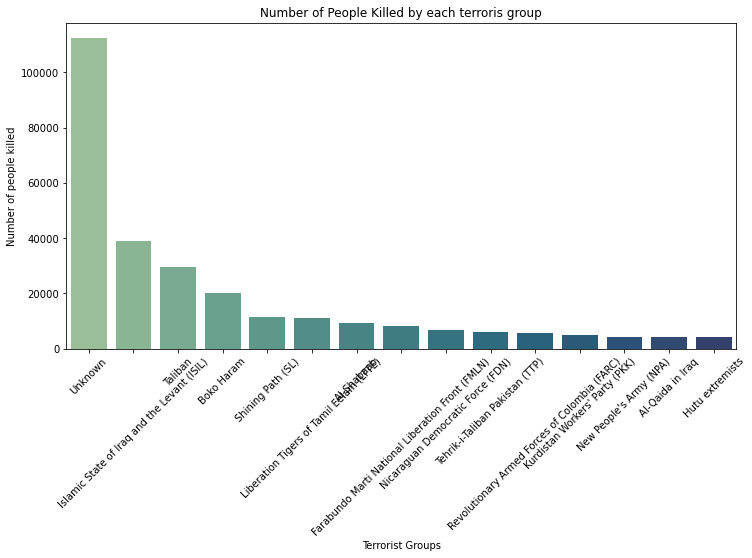

In [24]:
# People Killed by each group in terrorist activity
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.kill.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

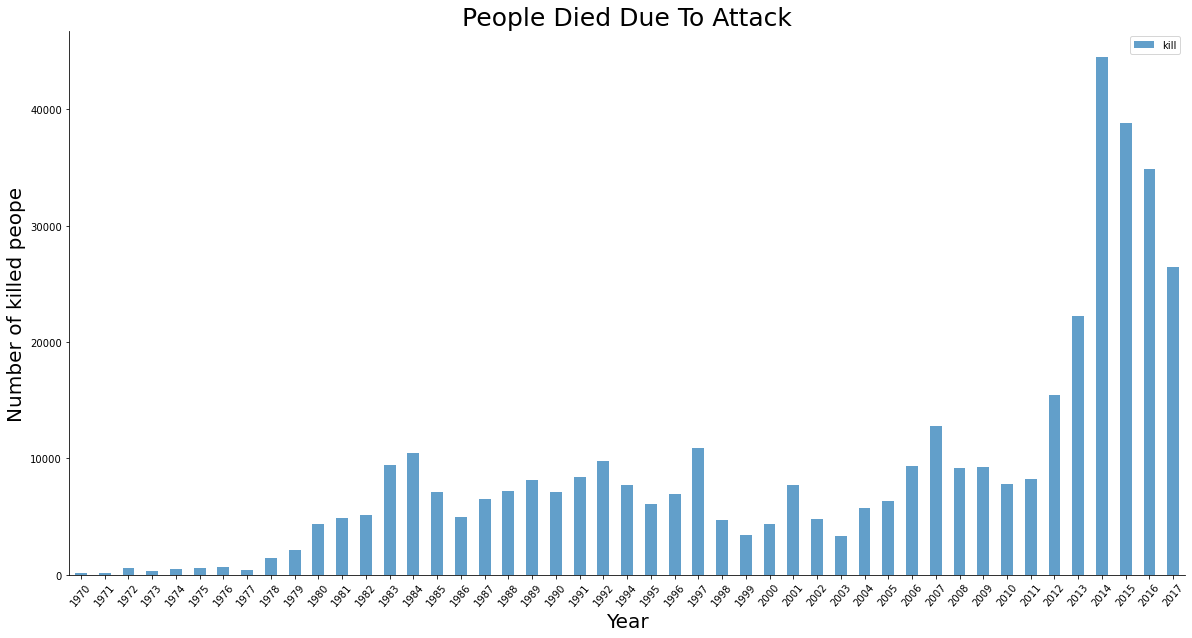

In [25]:
#Deaths over the years
ter_df = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
ter_df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

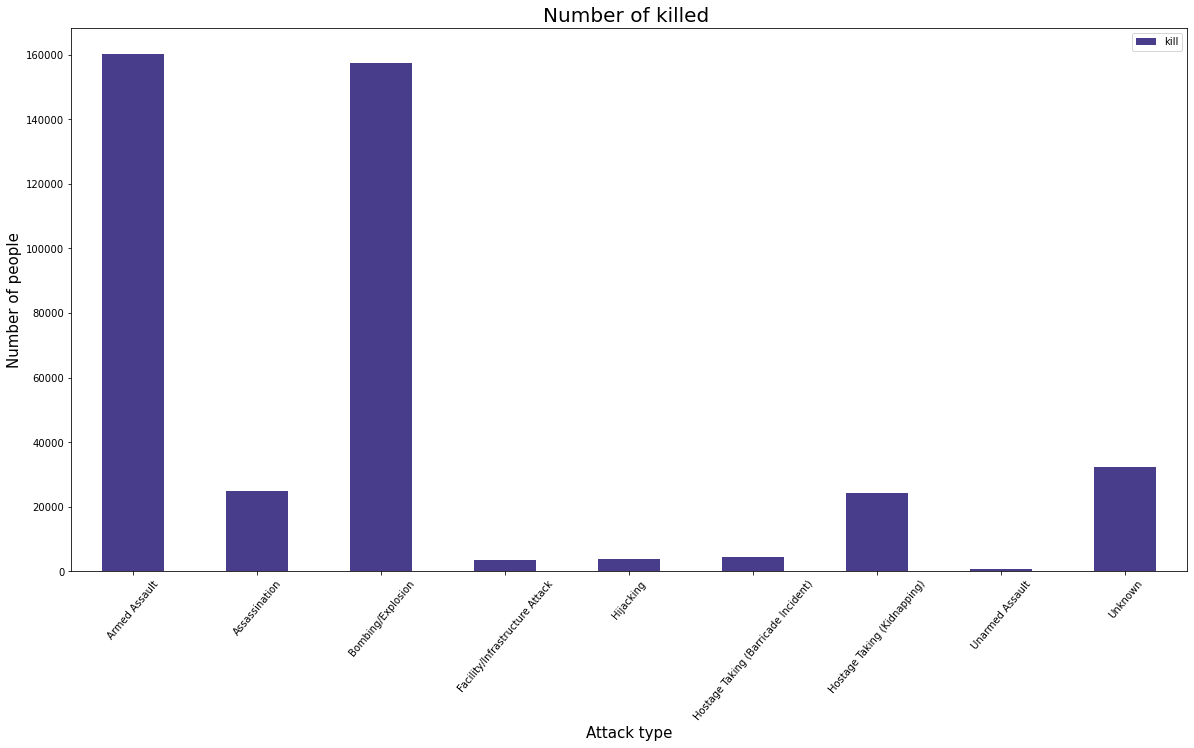

In [26]:
# Number of people killed with the type of attack
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

In [27]:
# Number of people killed by each terrorist group in each country.
t_df=df[['Group','Country','kill']]
t_df=t_df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
t_df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058
1,Taliban,Afghanistan,29269
2,Boko Haram,Nigeria,16917
3,Shining Path (SL),Peru,11595
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928
5,Al-Shabaab,Somalia,8176
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014


In [28]:
#Total number of various terror attacks
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297,24920,157321,3642,3718,4478,24231,880,32381


In [29]:
#Total number of persons killed by terror attacks per country
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


### CONCLUSION 